In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [15]:

file_path = '../file/mastodon_gambling_sentiment.json'
with open(file_path, 'r', encoding='utf-8') as f:
    twitter_file = json.load(f)

df = pd.DataFrame(twitter_file['rows'])

df['value'] = df['value'].apply(lambda x: x['sentiment'] / x['count'])
df['value'] = df['value'].apply(lambda x:2*x-1)

<BarContainer object of 2 artists>

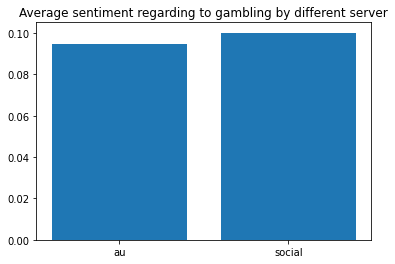

In [16]:
#plt.ylim(0,1)
plt.title('Average sentiment regarding to gambling by different server')
plt.bar(df['key'],df['value'])

In [21]:
file_path = '../file/politics_area.json'
with open(file_path, 'r', encoding='utf-8') as f:
    twitter_file = json.load(f)

df = pd.DataFrame(twitter_file['rows'])

<BarContainer object of 7 artists>

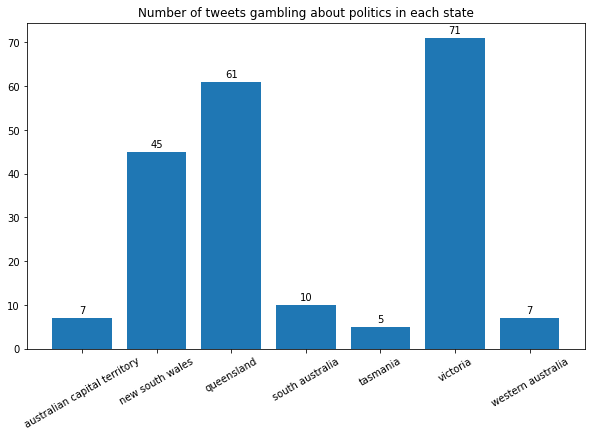

In [22]:
plt.figure(figsize=(10,6))
plt.title('Number of tweets gambling about politics in each state')
plt.xticks(rotation=30)
for i, v in enumerate(df['value']):
    plt.text(i, v + 1, str(v), ha='center')
plt.bar(df['key'],df['value'])

In [7]:
file_path = '../file/preferred_hours.json'
with open(file_path, 'r', encoding='utf-8') as f:
    twitter_file = json.load(f)
df = pd.DataFrame(twitter_file['rows'])
df['key'] = df['key'].apply(lambda x: x + 10)
df['key'] = df['key'].apply(lambda x:  x - 24 if x > 23 else x)
df = df.sort_values(by=['key'])


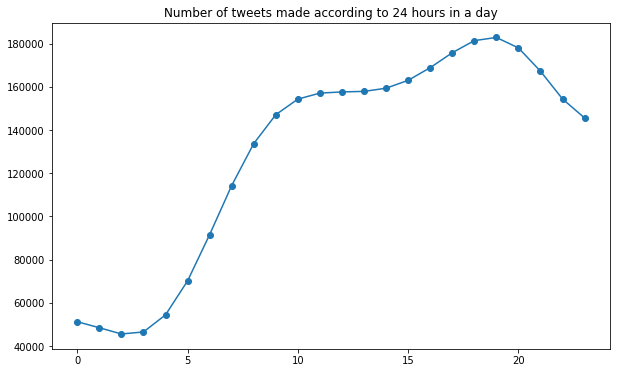

In [8]:
ysmoothed = gaussian_filter1d(df['value'], sigma=2)
plt.figure(figsize=(10,6))
plt.title('Number of tweets made according to 24 hours in a day')
plt.plot(df['key'], ysmoothed, marker='o')
plt.show()

In [25]:
file_path = '../file/vulgarity_sentiment_area.json'
with open(file_path, 'r', encoding='utf-8') as f:
    twitter_file = json.load(f)
df = pd.DataFrame(twitter_file['rows'])
df['x'] = df['value'].apply(lambda x: x[2])
df = df.drop(df[df.x < 50].index)
df['vul_pro'] = df['value'].apply(lambda x: x[0] / x[2])
df['senti'] = df['value'].apply(lambda x: x[1] / x[2])

<BarContainer object of 8 artists>

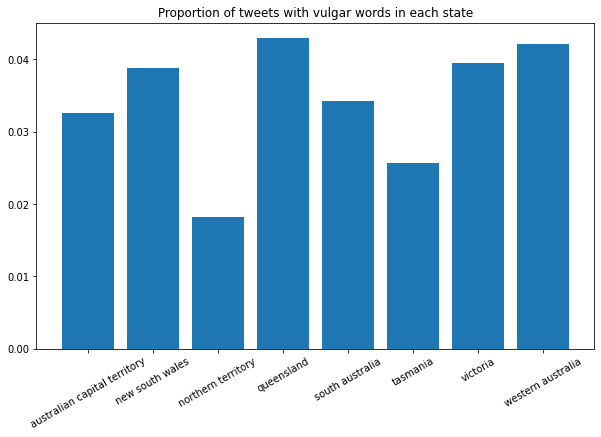

In [26]:
plt.figure(figsize=(10,6))
plt.title('Proportion of tweets with vulgar words in each state')
plt.xticks(rotation=30)
plt.bar(df['key'],df['vul_pro'])

<BarContainer object of 8 artists>

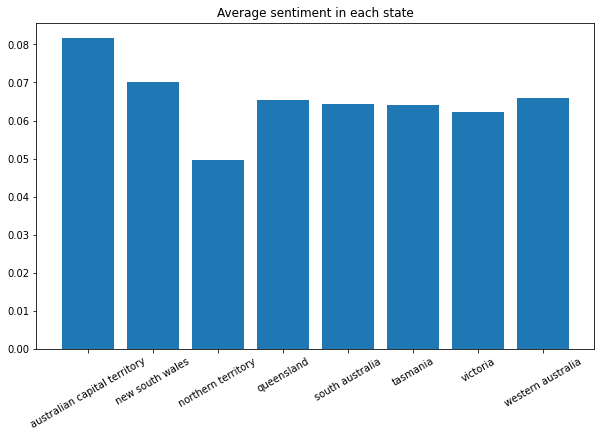

In [27]:
plt.figure(figsize=(10,6))
plt.title('Average sentiment in each state')
plt.xticks(rotation=30)
plt.bar(df['key'],df['senti'])